In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

* ## Data Pre_Processing

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train2.csv')

C:\Users\shubh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,5,6,7,9,27,28,29,30,31,32,33,34,40,41,42,43,44,45,46,47,48,49,55,56,57,58,59,60,61,62,64,70,71,72,73,74,75,76,79,85,86,87,88,89,90,91,93,94,100,101,102,103,104,105,106,107,108,109,115,116,117,118,119,120,121,123,124,130) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
test.head()

,Column 2,Label,Statement,Statement1
0,0,TRUE,Building a wall on the U.S.-Mexico border will...,"Meantime, engineering experts agree the wall w..."
1,1,FALSE,Wisconsin is on pace to double the number of l...,She cited layoff notices received by the state...
2,2,FALSE,Says John McCain has done nothing to help the ...,"Trump said that McCain ""has done nothing to he..."
3,3,half-true,Suzanne Bonamici supports a plan that will cut...,"But spending still goes up. In addition, many ..."
4,4,pants-fire,When asked by a reporter whether hes at the ce...,Our rating A Democratic Party web video making...


In [5]:
train.head()

,Column 2,Label,Statement,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130
0,0,FALSE,Says the Annies List political group supports ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,half-true,When did the decline of coal start? It started...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,mostly-true,"""Hillary Clinton agrees with John McCain """"by ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,half-true,"However, it took $19.5 million in Oregon Lotte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,mostly-true,Says GOP primary opponents Glenn Grothman and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning...

In [6]:
def Data_Clean():
  print("Processing...")
# Train
  train.isnull().sum()
  train.info()


# Test
  test.isnull().sum()
  test.info()


Data_Clean()
print("Cleaning over..")

Processing...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Columns: 131 entries, Column 2 to Unnamed: 130
dtypes: float64(46), int64(1), object(84)
memory usage: 5.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Column 2    1267 non-null   int64 
 1   Label       1267 non-null   object
 2   Statement   1267 non-null   object
 3   Statement1  1258 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.7+ KB
Cleaning over..


In [7]:
train.head()

,Column 2,Label,Statement,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130
0,0,FALSE,Says the Annies List political group supports ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,half-true,When did the decline of coal start? It started...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,mostly-true,"""Hillary Clinton agrees with John McCain """"by ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,half-true,"However, it took $19.5 million in Oregon Lotte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,mostly-true,Says GOP primary opponents Glenn Grothman and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Shape of each set
print("Shape of TRAIN DATA: ", train.shape)
print("Shape of TEST DATA: ", test.shape)

Shape of TRAIN DATA:  (5012, 131)
Shape of TEST DATA:  (1267, 4)


In [9]:
train.describe(), test.describe()

(           Column 2  Unnamed: 8  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
 count   5012.000000    7.000000     6.000000     6.000000     6.000000   
 mean    5032.917598   27.857143    10.666667     9.500000     8.333333   
 std     2971.190640   60.028961    14.165686    12.340989     8.891944   
 min        0.000000    0.000000     0.000000     1.000000     1.000000   
 25%     2480.750000    0.500000     1.000000     1.250000     1.000000   
 50%     4922.500000    1.000000     4.500000     5.000000     5.500000   
 75%     7667.250000   15.000000    15.500000    11.000000    13.750000   
 max    10239.000000  163.000000    36.000000    33.000000    22.000000   
 
        Unnamed: 23  Unnamed: 24  Unnamed: 35  Unnamed: 36  Unnamed: 37  ...  \
 count     6.000000     6.000000     4.000000     4.000000     4.000000  ...   
 mean     11.666667     2.333333     1.750000     1.500000     1.500000  ...   
 std      15.895492     3.386247     0.957427     1.914854     1.914854  ...   
 mi

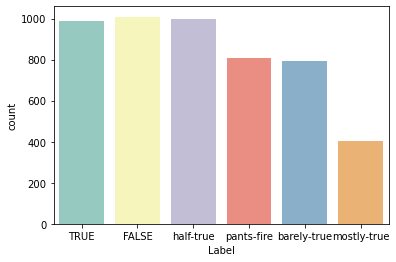

In [48]:
# Distribution of classes for prediction
def Class_Distr(datafile):
    return sb.countplot(x='Label', data= datafile, palette='Set3')

# Even Distribution of data between Train and Test dataset

Class_Distr(train)
Class_Distr(test)


In [11]:
# Saving the original Data for future
train_orig = train.copy()
test_orig = test.copy()

In [12]:
# Stemming 
def stemming(str_tokens, str_stemmer):
    stemmed_str = []
    for token_i in str_token:
        stemmed.append(str_stemmer.stem(token_i))

    return stemmed

In [13]:
# Data process

def data_process(data, exclude_stopword = True, stem = True):
  str_tokens = [w.lower() for w in data]
  stemmed_tokens = str_tokens
  stemmed_tokens = stemming(str_tokens, eng_stemmer)
  stemmed_tokens = [w for w in stemmed_tokens if w not in stopwords ]
  
  return tokens_stemmed
  

In [14]:
 
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    gap = 0
    joinned_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,gap+2):
                if i+k < Len:
                    lst.append(joinned_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [15]:
# Trigram creation

def create_trigrams(words):
    assert type(words) == list
    gap == 0
    joinned_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,gap+2):
            for k1 in range(1, gap+2):
                for k2 in range(1,gap+2):
                    if i+k1 < Len and i+k1+k2 < Len:
                        lst.append(joinned_str.join([words[i], words[i+k1],words[i+k1+k2]]))
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst

In [16]:
porter_str = PorterStemmer()

In [17]:
def porter_tokenizer(statement):
    return [porter.stem(word) for word in statement.split()]


* ## Feature Scalling..

In [18]:
! pip install gensim

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\s

[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data] 

[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |  

True

In [20]:
# creating word matrix  with bag of word technique
countV = CountVectorizer()
train_count = countV.fit_transform(train['Statement'].values)

print(countV)
print(train_count)

def countVectorizer_matrix():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])



CountVectorizer()
  (0, 6937)	1
  (0, 7856)	1
  (0, 725)	1
  (0, 4756)	1
  (0, 5981)	1
  (0, 3660)	1
  (0, 7660)	1
  (0, 7885)	1
  (0, 8078)	1
  (0, 425)	1
  (0, 5529)	1
  (0, 2350)	1
  (1, 7856)	1
  (1, 8544)	2
  (1, 2465)	1
  (1, 2274)	1
  (1, 5492)	1
  (1, 1762)	1
  (1, 7455)	1
  (1, 4335)	1
  (1, 7456)	2
  (1, 5314)	1
  (1, 3479)	1
  (1, 7962)	1
  (1, 5493)	1
  :	:
  (5011, 7856)	1
  (5011, 5492)	2
  (5011, 7939)	2
  (5011, 5611)	1
  (5011, 5608)	1
  (5011, 3759)	1
  (5011, 4528)	1
  (5011, 8690)	2
  (5011, 810)	1
  (5011, 7869)	1
  (5011, 2376)	1
  (5011, 8696)	1
  (5011, 7862)	1
  (5011, 8338)	2
  (5011, 4730)	1
  (5011, 558)	1
  (5011, 1816)	1
  (5011, 6437)	1
  (5011, 7620)	1
  (5011, 8309)	1
  (5011, 2843)	1
  (5011, 7571)	1
  (5011, 1833)	1
  (5011, 7802)	1
  (5011, 4915)	1


In [21]:
# create tf-df features 
tfidfV = TfidfTransformer()

train_tfidf = tfidfV.fit_transform(train_count)

In [22]:
def tfidf_matrix():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


#bag of words - with n-grams
#tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf = True,smooth_idf = True)



In [23]:
# Tags
nltk.download('averaged_perceptron_tagger')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train['Statement']
 
print(training_sentences)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0       Says the Annies List political group supports ...
1       When did the decline of coal start? It started...
2       "Hillary Clinton agrees with John McCain ""by ...
3       However, it took $19.5 million in Oregon Lotte...
4       Says GOP primary opponents Glenn Grothman and ...
                              ...                        
5007    There are a larger number of shark attacks in ...
5008    Democrats have now become the party of the [At...
5009    Says an alternative to Social Security that op...
5010    On lifting the U.S. Cuban embargo and allowing...
5011    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 5012, dtype: object


In [24]:

def features_Scale(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }
    

In [25]:
# Fuction to strips the tags

def untagging(tagged_sentences):
    return [w for w,t in tagged_sentences]

# Applying Word2vec

with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
        for line in lines}

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [26]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

* ## Classification
* Six-Way Classification

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve,  GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [28]:
#string to test
#doc_new = ['Says Rush Limbaugh made it clear hed rather see the country fail than President Barack Obama succeed.']
statement_doc = ['We are already almost halfway to our 2010 goal of creating 700,000 new jobs in seven years.']

Using Bag Words Technique using previous features that we scalled we classify the dataset with:

* Random Forest Classification Algorithm

In [29]:
#Random Forest
random_forest = Pipeline([
        ('rfCV',countV),
        ])
print("Accuracy: ")    
random_forest.fit(train['Statement'],train['Label'])
predicted_rf = random_forest.predict(test['Statement'])
np.mean(predicted_rf == test['Label'])

Accuracy: 


0.26045777426992894

In [30]:
# # from sklearn import svm
# # from sklearn.feature_selection import FeatureSelection

# # svm_pipeline = Pipeline([
# #         ('svm2CV',FeatureSelection.countV),
# #         ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
# #         ])

# # svm_pipeline.fit(train['Statement'],train['Label'])
# # predicted_svm = svm_pipeline.predict(test['Statement'])
# # np.mean(predicted_svm == test['Label'])

# import pandas as pd
# import numpy as np
# import keras
# import keras.utils
# from keras import utils as np_utils
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.models import Model
# from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
# from keras.optimizers import RMSprop
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# from keras.utils import to_categorical
# from keras.callbacks import EarlyStopping
# from keras import regularizers
# from keras import optimizers
# from keras.models import Sequential
# import tensorflow as tf

# from getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# import scikitplot.plotters as skplt

# max_words = 1000
# max_len = 150
# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(train)
# sequences = tok.texts_to_sequences(train['Statement'])
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# model = keras.Sequential([keras.layers.Flatten(input_shape = train.shape),
#                 keras.layers.Dense(128,activation = tf.nn.sigmoid),                          
#                 keras.layers.Dense(10,activation = tf.nn.softmax)])
# model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])
# def baseline_model():
#     '''Neural network with 3 hidden layers'''
#     model = Sequential()
#     model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.3))
#     model.add(Dense(256, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.5))
#     model.add(Dense(80, activation='relu', kernel_initializer='normal'))
#     model.add(Dense(2, activation="softmax", kernel_initializer='normal'))

#     # gradient descent
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
#     # configure the learning process of the model
#     model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#     return model


# model = baseline_model()
# model.summary()
# # x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)
# label_encoder = LabelEncoder()
# label_encoder.fit(train['Label'])# state->label
# encoded_y = np_utils.to_categorical((label_encoder.transform(train['Label'])))## y_train=train['Statement'], x_test=test['Label']
# label_encoder.fit(test['Label'])
# encoded_test['Statement'] = np_utils.to_categorical((label_encoder.transform(test['Statement'])))
# estimator = model.fit(train['Statement'], encoded_y, epochs=20, batch_size=64)
# print("Model Trained!")
# score = model.evaluate(test['Label'], encoded_test['Statement'])
# print("")
# print("Accuracy = " + format(score[1]*100, '.2f') + "%")   

In [31]:
# model.fit(train['Statement'], train['Label'],epochs = 5)

In [32]:
! pip install -U Scikit-learn

Requirement already up-to-date: Scikit-learn in c:\users\shubh\anaconda3\lib\site-packages (0.24.1)


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Confusion Matrix ==> \n\n", confusion_matrix(test['Label'], predicted_rf))
print("\n\n Accuracy Score: ", accuracy_score(test['Label'], predicted_rf)*100)
print("\n____________________________________________________________________\n")
print("Classification Report of Random Forest: \n\n", classification_report(test['Label'], predicted_rf))

Confusion Matrix ==> 

 [[126   1  19  11  33  59   0]
 [  0   0   0   0   0   0   0]
 [ 64   0  29   6  31  78   0]
 [ 88   0  12  20  35  57   0]
 [104   0  21  15  56  69   0]
 [ 74   0  20  11  40  96   0]
 [ 44   0   4   7  22  12   3]]


 Accuracy Score:  26.045777426992895

____________________________________________________________________

Classification Report of Random Forest: 

                                                                                                     precision    recall  f1-score   support

                                                                                             FALSE       0.25      0.51      0.34       249
Our income, our GDP per capita, is almost 50 percent higher than (it is for) the average European.       0.00      0.00      0.00         0
                                                                                              TRUE       0.28      0.14      0.19       208
                                            

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* ## Prediction Test of a Model...

In [34]:
import pickle

In [35]:
Saved_model = 'Model.sav'
pickle.dump(random_forest,open(Saved_model,'wb'))

In [49]:
var = input("Enter the news text you want to test or verify: ")
print("Your Entry: " + str(var))

# Here we go with the prediction:
def detecting_fake_news(var):    
    load_model = pickle.load(open('Model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("Folowing Statement predicted as:  ",prediction[0]),
        print("The truth probability score will be:  ",prob[0][1]))
  
if __name__ == '__main__':
    detecting_fake_news(var)

Enter the news text you want to test or verify: The rainfall in India is going to be 28% higher in 2022
Your Entry: The rainfall in India is going to be 28% higher in 2022
Folowing Statement predicted as:   FALSE
The truth probability score will be:   0.35428571428571426


In [ ]:
Random
LSTM
SVM